In [29]:
import numpy as np
import pandas as pd
import random
from itertools import islice
from klon_tree import KlonTree
from benchmarking import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_seeds = clf_seeds(all_solutions)
solved_min = list(all_seeds['Solved-Min'])
seed = random.choice(solved_min)

In [5]:
def branching_factor(seed):
    state, seq = state_with_moveseq(f"./bench/shootme/{seed}")
    tree = KlonTree(state)
    branches = []
    while len(seq):
        move = seq.pop(0)
        if move.startswith('F') or move == 'NEW':
            continue
        legal_moves = tree.legal_moves()
        assert move in legal_moves, f"illegal move {move}"
        branches.append(len(legal_moves))
        tree.make_move(move)
    return np.average(branches), len(branches)

branching_factor(seed)

In [18]:
solvedmin = pd.DataFrame(
    map(branching_factor, all_seeds["Solved-Min"]), 
    columns=['branch', 'depth']
)
solvedmin.mean()

branch     9.616784
depth     90.165312
dtype: float64

In [19]:
solved = pd.DataFrame(
    map(branching_factor, all_seeds["Solved"]), 
    columns=['branch', 'depth']
)
solved.mean()

branch     9.568696
depth     94.559375
dtype: float64

In [25]:
alldata = pd.concat([solvedmin, solved])
alldata.mean()

branch     9.614906
depth     90.336872
dtype: float64

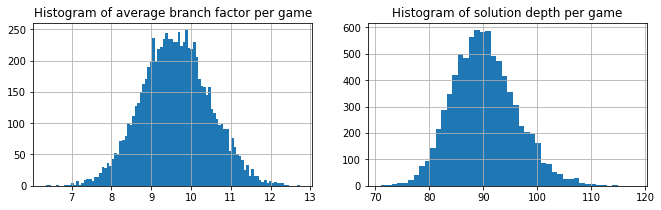

In [76]:
fig, (left, right) = plt.subplots(1, 2, figsize=(11, 3))
alldata.branch.hist(bins=100, ax=left)
left.set_title('Histogram of average branch factor per game');
alldata.depth.hist(bins=46, ax=right)
right.set_title("Histogram of solution depth per game");